In [2]:
import numpy as np
import networkx as nx
from qwalk_simulator_helper import(
    classical_random_walk, quantum_walk, print_state_vectors,
    plot_graph, get_probability_difference, visualize_probabilities,
    create_cayley_tree, plot_cayley_tree_central, create_wheel_graph, plot_wheel_graph, get_pi_frac)

### Define the Graph:
We can choose from the many NetworkX graph generators found at this link:

https://networkx.org/documentation/stable/reference/generators.html

We can specify any adjacency matrix, or build a graph using nx to directly add nodes and edges



In [3]:

# define any graph you'd like from the networkx library
G1 = nx.hypercube_graph(3)
G2 = nx.cycle_graph(10)
G3 = nx.grid_2d_graph(6, 6)
G4 = nx.balanced_tree(3,3)
G5 = nx.lollipop_graph(8,10)

# Or define a graph from an adjacency matrix (defined as an array) 
user_adj = np.array([
    [0,1,1,1,1,0,0],
    [1,0,1,1,1,0,0],
    [1,1,0,1,0,1,0],
    [1,1,1,0,1,1,1],
    [1,1,0,1,0,0,1],
    [0,0,1,1,0,0,0],
    [0,0,0,1,1,0,0]
    ])

# Another option is to use networkx to define a method to generate any large size graph 


G6 = nx.from_numpy_array(user_adj)

# We can implement methods to generate graphs of particular interest
wheel_graph = create_wheel_graph(8)
caylay_graph = create_cayley_tree(3,4)

### To See What We're Dealing With, Let's First Plot Our Graph

Let's start with the Cayley tree, as it also has an efficient discrete walk implementation found in this paper:

https://journals.aps.org/pra/abstract/10.1103/PhysRevA.86.042338




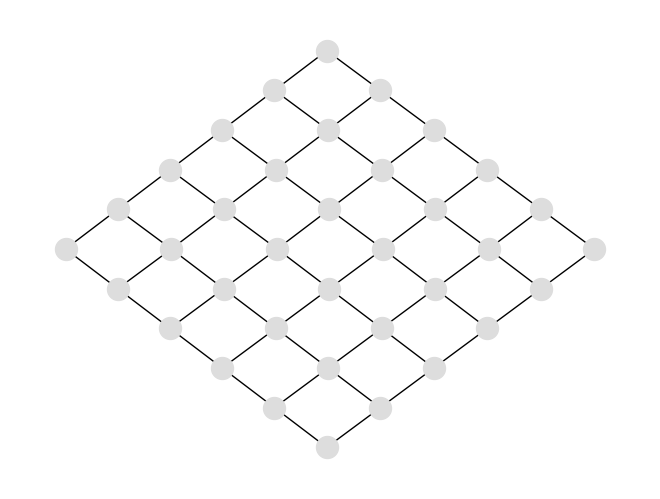

In [4]:
graph = G3

# Plot graphs
plot_graph(graph,labels=False)

# Plot specific graphs
# plot_wheel_graph(graph)

### Choose the node where you'd like to start your walk
we might want to set psi0 to a superposition for the initial state.

In [46]:
# Initial state vector (starting at node 0)
#Get the adjacency from nx
A = nx.adjacency_matrix(graph)

num_nodes = A.shape[0]
pos_0 = np.zeros(num_nodes)
pos_0[0] = 1  # Classical initial state
psi_0 = pos_0.copy() # Quantum initial state

print(f"Classical initial state: {pos_0}")
print(f"\nQuantum initial state: {psi_0}")

Classical initial state: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Quantum initial state: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Let's run a single step based on a time step and the initial state

In [47]:
# Time parameters
t_c = 5
t_q= np.pi/5

# Compute the classical random walk probabilities
pos_t = classical_random_walk(adjacency = A, initial_position = pos_0, time_step = t_c)
prob_classical = pos_t

# Compute the quantum walk probabilities
psi_t = quantum_walk(adjacency = A, initial_position = psi_0, time_step = t_q)
prob_quantum = np.abs(psi_t)**2

#Compute the difference between classical and quantum
prob_diff = get_probability_difference(p_quantum=prob_quantum, p_classical=prob_classical)

print_state_vectors(prob_quantum, "Quantum Walk")
# print_state_vectors(prob_classical, "Classical Walk")
# print_state_vectors(prob_diff, "Difference")



==== Quantum Walk State Vector ====
Node 1: 0.4416
Node 2: 0.2007
Node 3: 0.0212
Node 4: 0.0010
Node 5: 0.0000
Node 6: 0.0000
Node 7: 0.2007
Node 8: 0.0912
Node 9: 0.0096
Node 10: 0.0004
Node 11: 0.0000
Node 12: 0.0000
Node 13: 0.0212
Node 14: 0.0096
Node 15: 0.0010
Node 16: 0.0000
Node 17: 0.0000
Node 18: 0.0000
Node 19: 0.0010
Node 20: 0.0004
Node 21: 0.0000
Node 22: 0.0000
Node 23: 0.0000
Node 24: 0.0000
Node 25: 0.0000
Node 26: 0.0000
Node 27: 0.0000
Node 28: 0.0000
Node 29: 0.0000
Node 30: 0.0000
Node 31: 0.0000
Node 32: 0.0000
Node 33: 0.0000
Node 34: 0.0000
Node 35: 0.0000
Node 36: 0.0000


### Visualize the probability distribution by passing in the graph and the state vector. if the graph is large it's better to remove the labels 

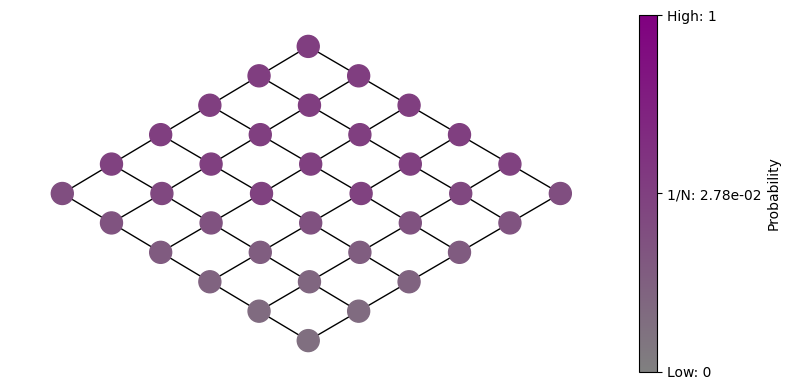

In [50]:
#Classical
visualize_probabilities(graph, prob_classical, labels=False)

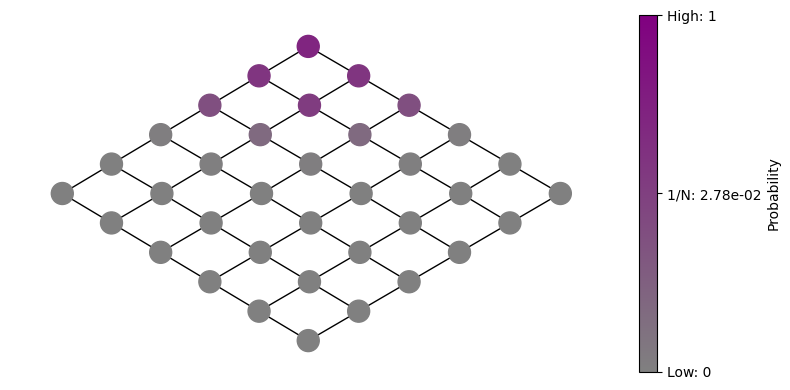

In [51]:
#Quantum  
visualize_probabilities(graph, prob_quantum, labels=False)

#### ### It's time to put it all together and try out different things 
#### Note: At the bottom of the page, there is an attempt to simulate an interactive walk with a time slider. We still need to fix the bug that makes the figure not show.


/Users/yuvalol/Desktop/quantum_walks/qwalk_simulator_helper.py:104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 4))


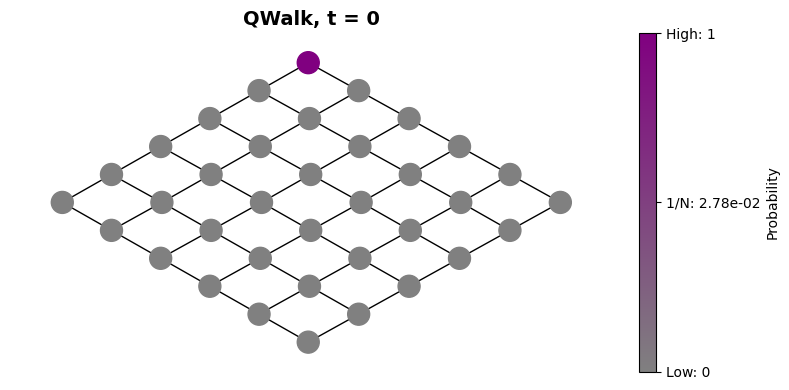

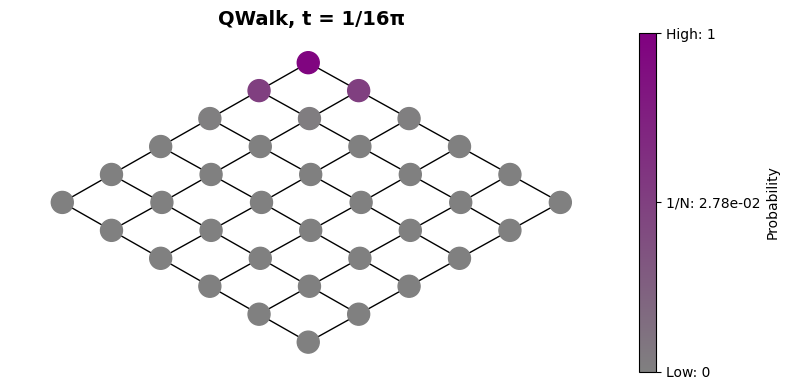

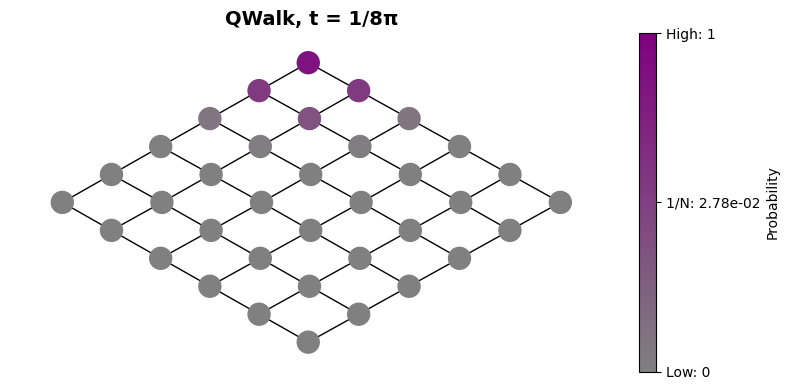

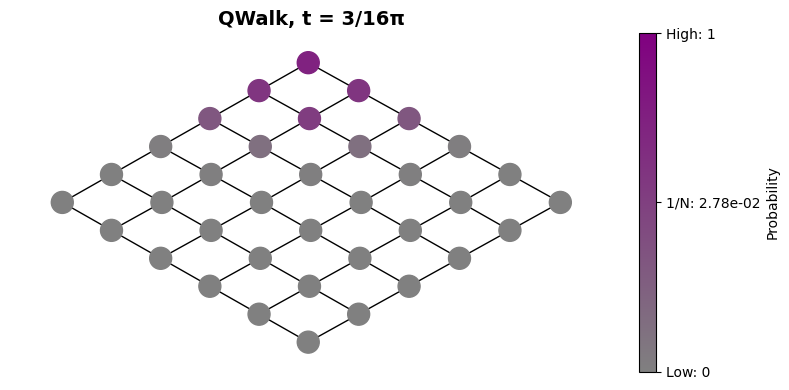

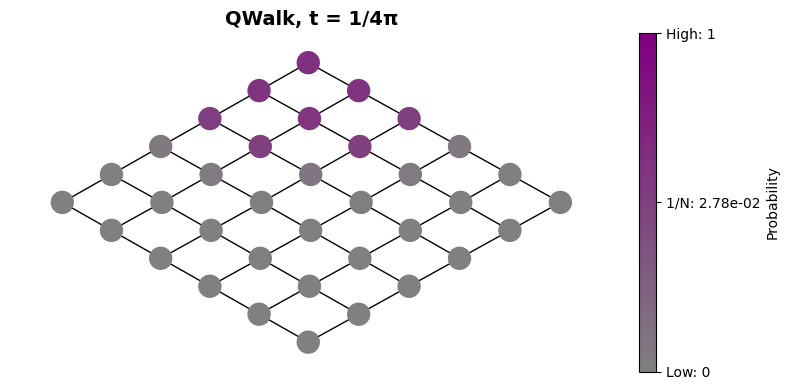

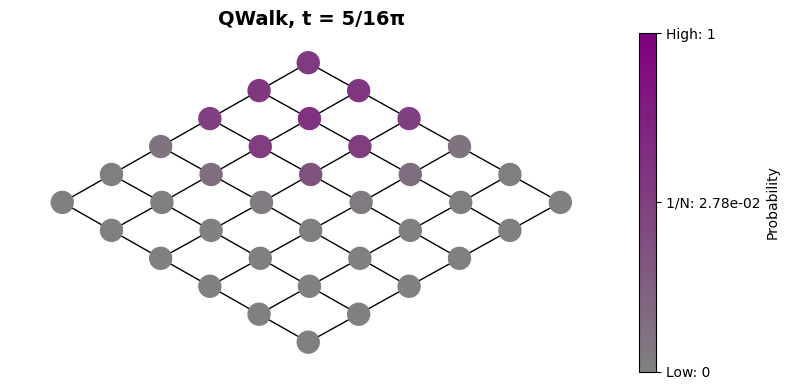

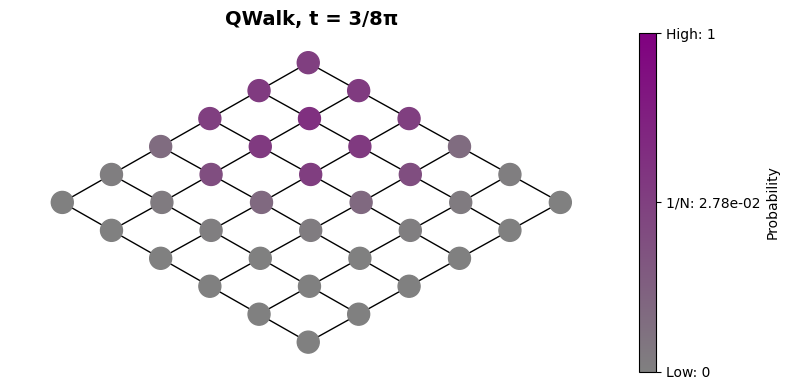

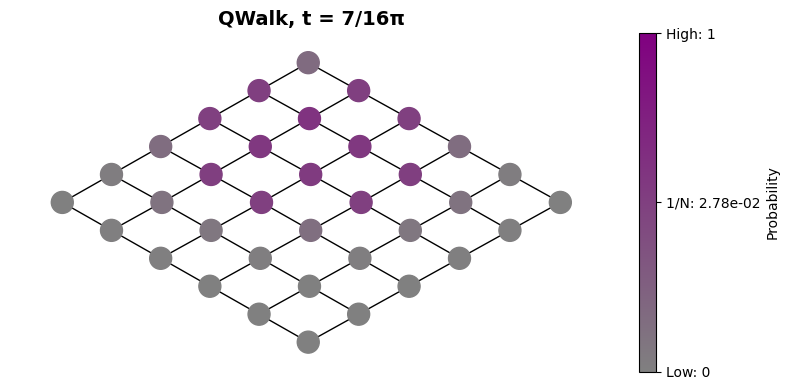

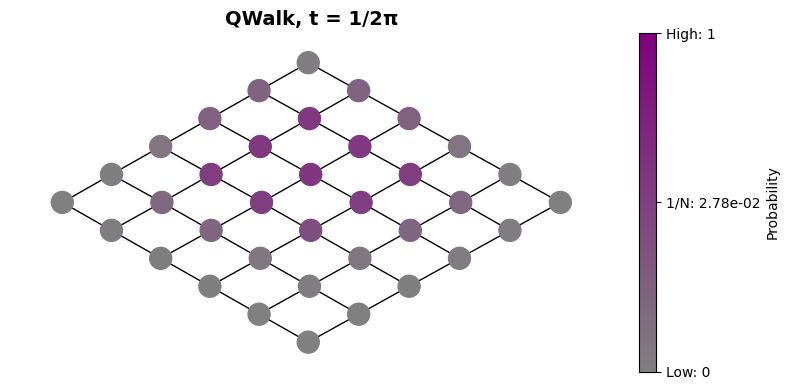

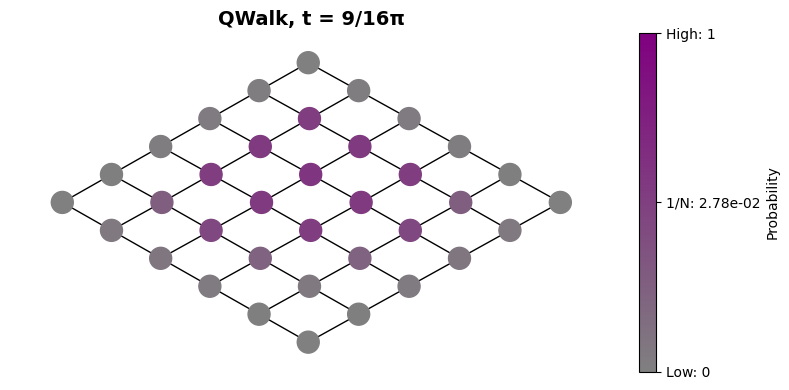

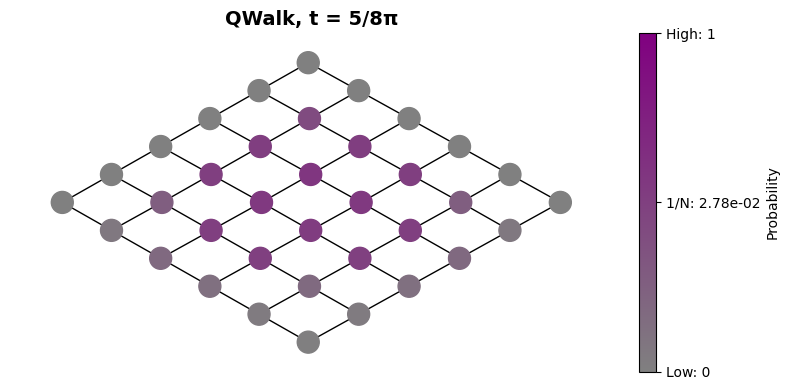

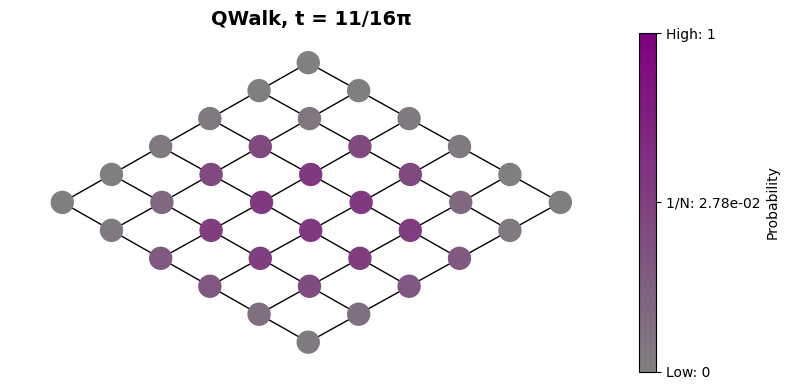

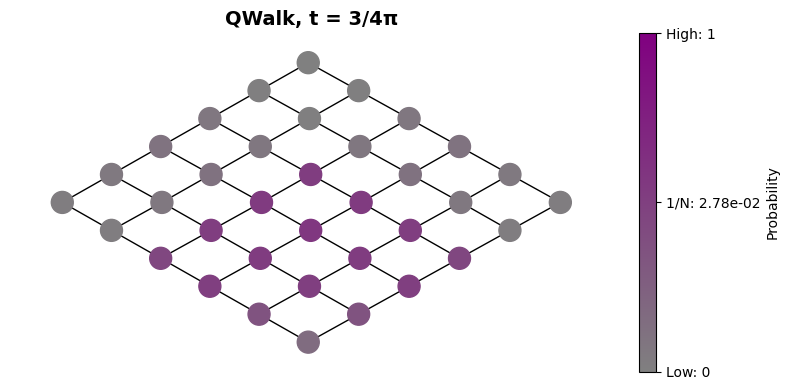

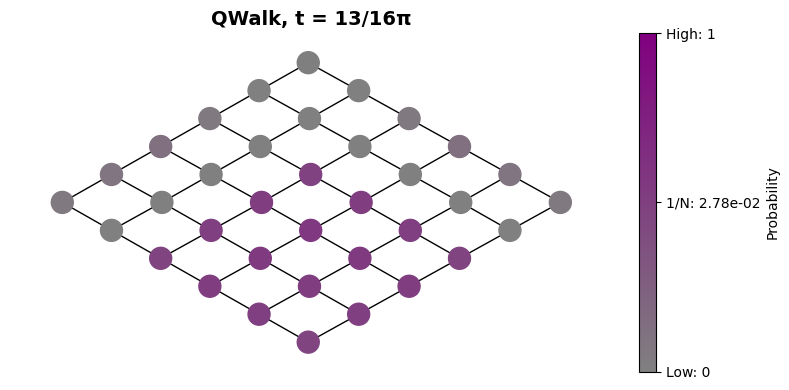

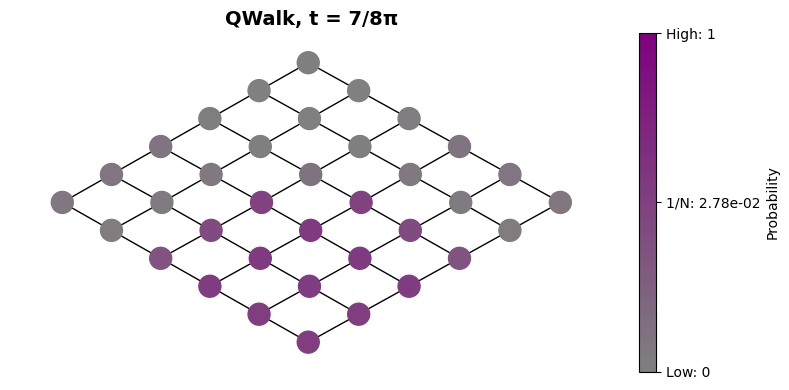

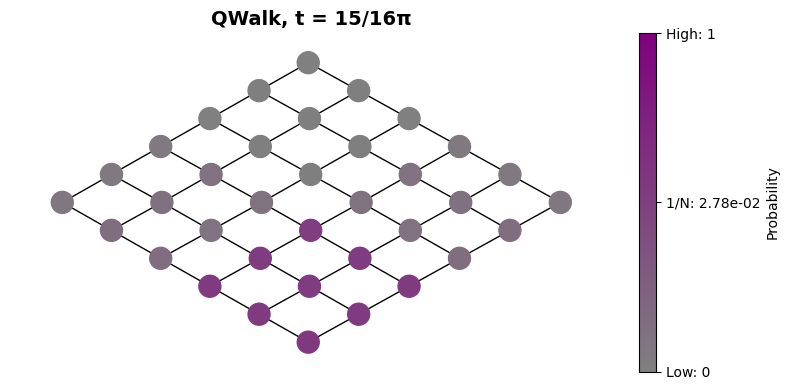

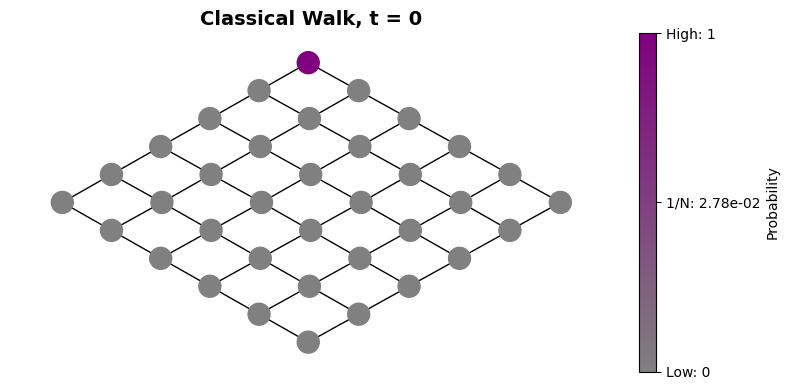

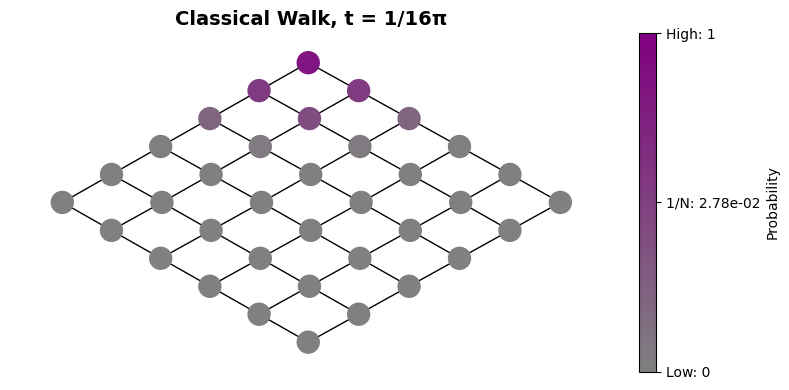

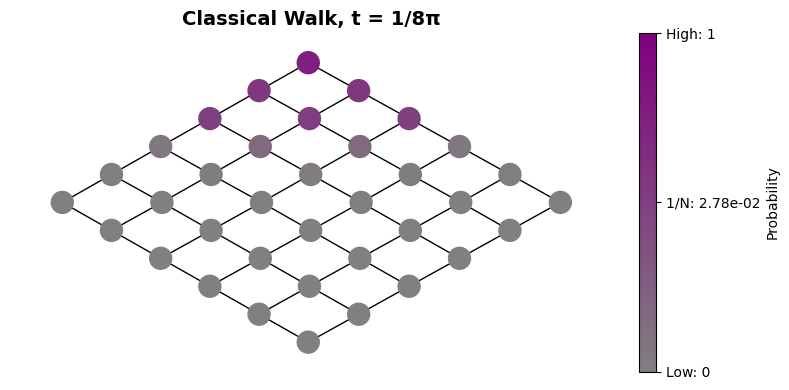

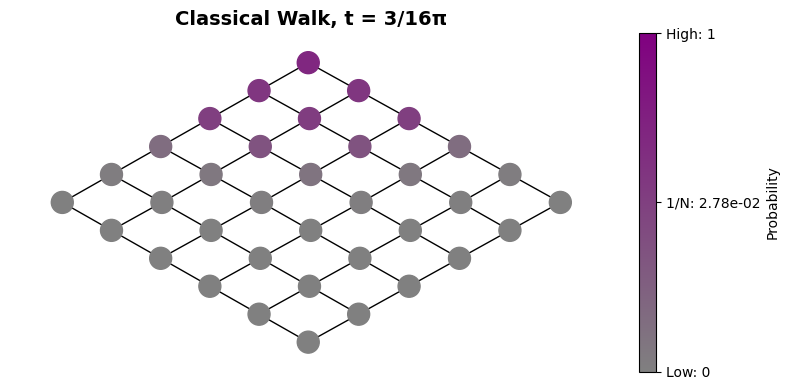

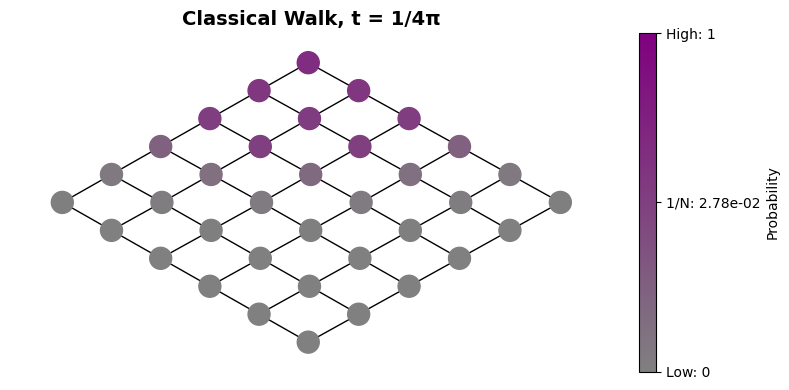

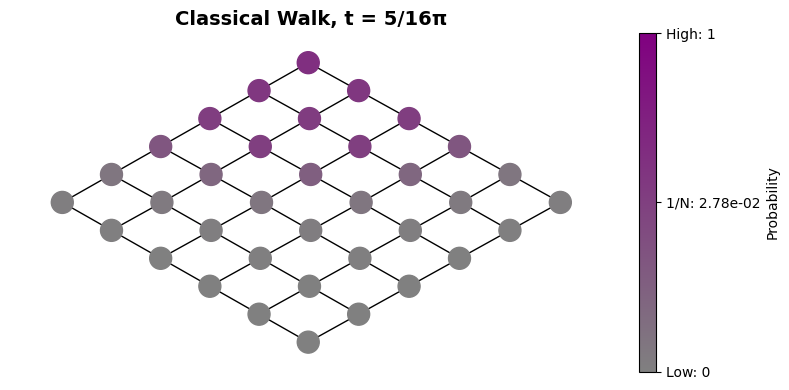

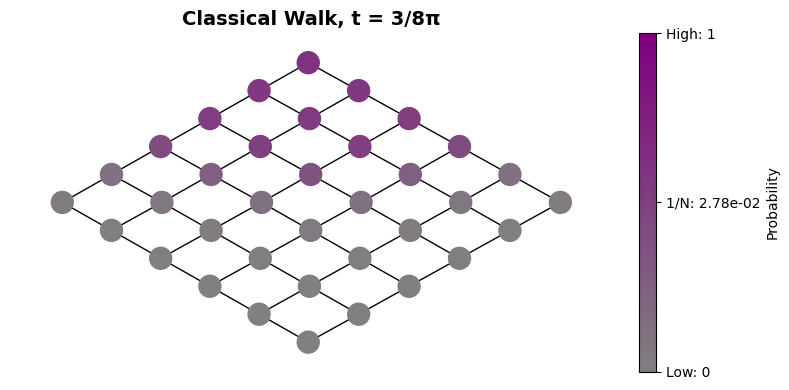

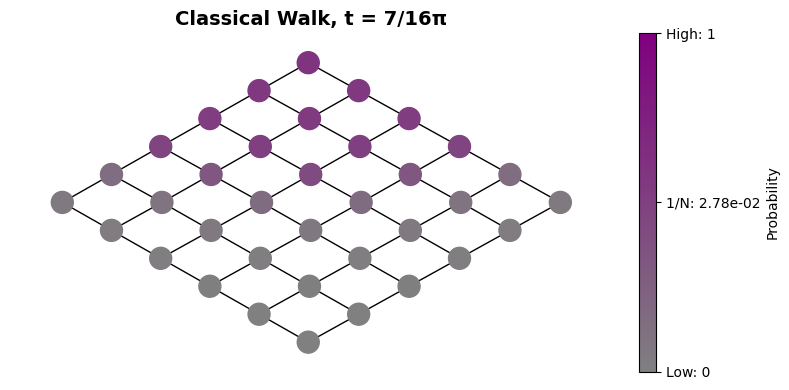

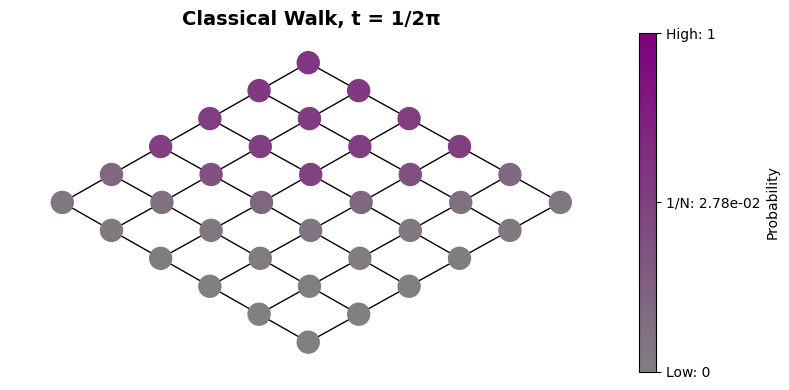

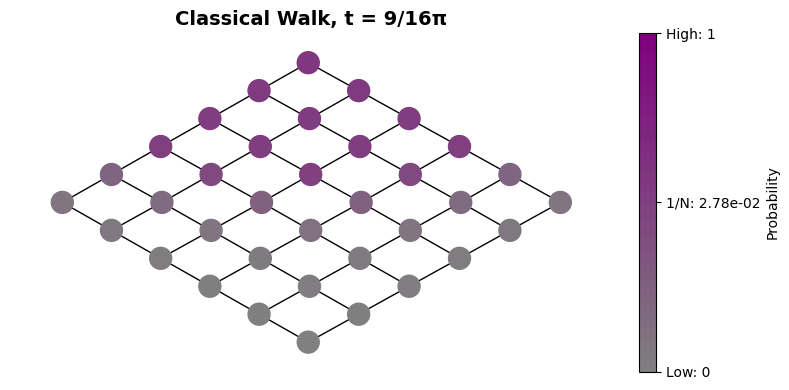

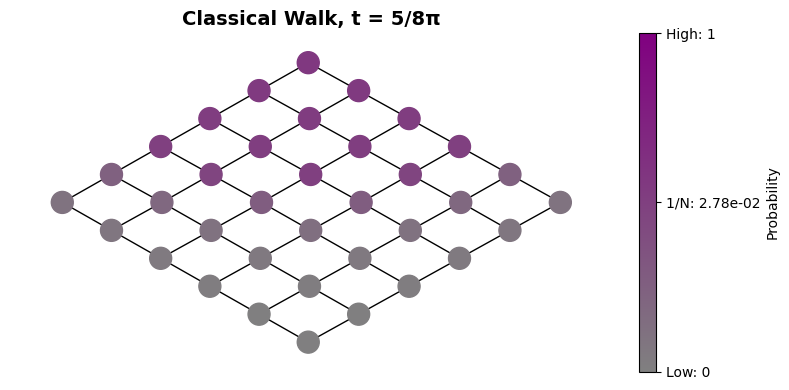

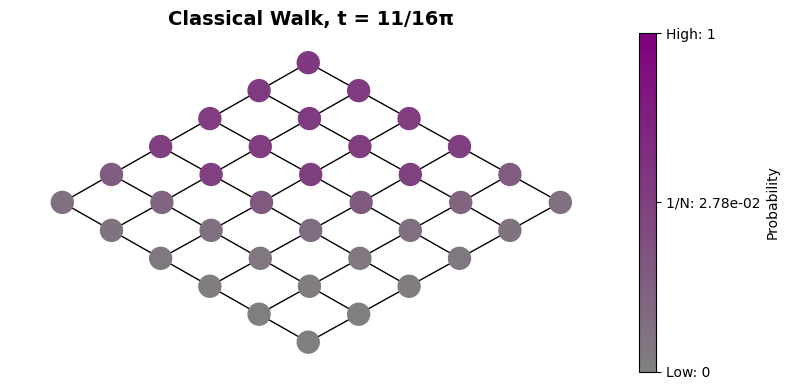

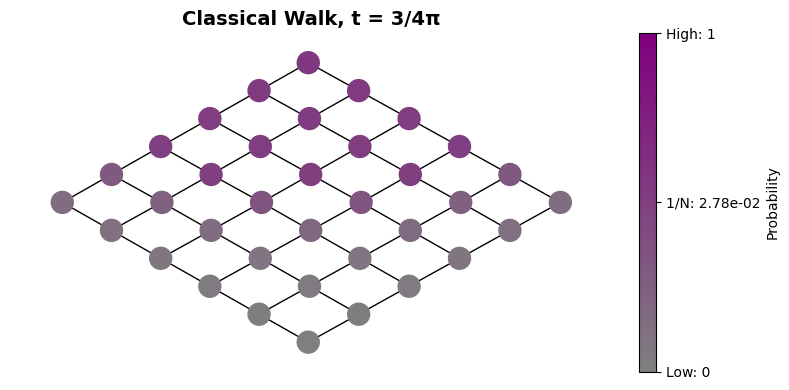

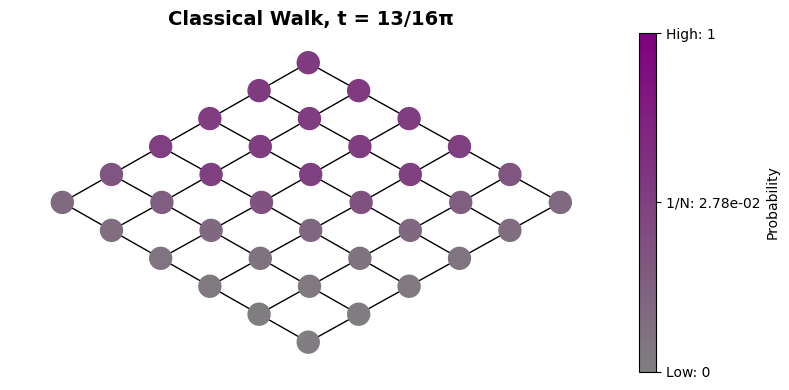

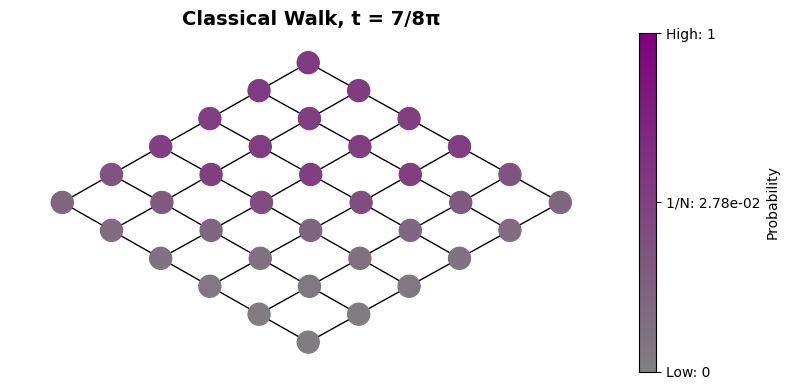

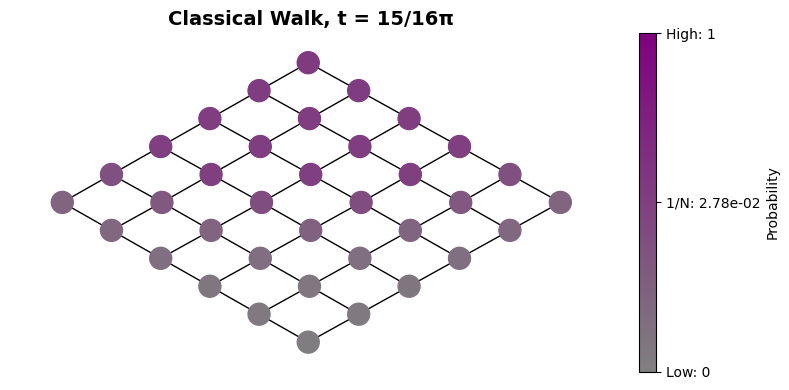

In [53]:
#Playground full of different graphs to choose from

# define any graph you'd like from the networkx library
G1 = nx.hypercube_graph(3)
G2 = nx.cycle_graph(10)
G3 = nx.grid_2d_graph(6, 6)
G4 = nx.balanced_tree(3,3)
G5 = nx.lollipop_graph(8,10)

# Or define a graph from an adjacency matrix (defined as an array) 
user_adj = np.array([
    [0,1,1,1,1,0,0],
    [1,0,1,1,1,0,0],
    [1,1,0,1,0,1,0],
    [1,1,1,0,1,1,1],
    [1,1,0,1,0,0,1],
    [0,0,1,1,0,0,0],
    [0,0,0,1,1,0,0]
    ])

# Another option is to use networkx to define a method to generate any large size graph 


G6 = nx.from_numpy_array(user_adj)

# We can implement methods to generate graphs of particular interest
wheel_graph = create_wheel_graph(8)
caylay_graph = create_cayley_tree(3,4)

my_graph = G3
#Get the adjacency from nx
Adj = nx.adjacency_matrix(my_graph)

# Initial state vector 
num_nodes = Adj.shape[0]
pos_0 = np.zeros(num_nodes)
pos_0[0] = 1  # Classical initial state
psi_0 = pos_0.copy()  # Quantum initial state

# Time parameters: 
t_n = 0 # Starting time
timestep = np.pi/16 # step value
n = 16 # Number of steps


for i in range(n):
    # Compute the quantum walk probabilities
    psi_t = quantum_walk(adjacency = Adj, initial_position = psi_0, time_step = t_n)
    prob_quantum = np.abs(psi_t)**2
    
    str = get_pi_frac(i,16)
    title = f"QWalk, t = {str}"
    visualize_probabilities(my_graph,prob_quantum, labels=False, title=title)
    
    t_n += timestep


t_n = 0 
for i in range(n):
    # Compute the classical walk probabilities
    pos_t = classical_random_walk(adjacency = Adj, initial_position = pos_0, time_step = t_n)
    str = get_pi_frac(i,16)
    title = f"Classical Walk, t = {str}"
    visualize_probabilities(my_graph,pos_t, labels=False, title=title)
    
    t_n += timestep
    

### Will fix this soon :) 

In [10]:
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import networkx as nx

# Create an output widget to display results
output = widgets.Output()

def update_plot(step_value):
    global t_classical, t_quantum
    t_classical += step_value
    t_quantum += step_value

    # Compute new probabilities
    pos_t = classical_random_walk(A, pos_0, t_classical)
    psi_t = quantum_walk(A, psi_0, t_quantum)
    prob_classical = pos_t
    prob_quantum = np.abs(psi_t)**2
    prob_diff = get_probability_difference(prob_quantum, prob_classical)

    # Clear previous output and display new
    with output:
        clear_output(wait=True)

        # Print results
        print(f"==== Classical State Vector ====\n{prob_classical}"
              f"\n\n==== Quantum State Vector ====\n{prob_quantum}")

        # # Plot Classical Walk Probabilities
        # visualize_probabilities(my_graph, prob_classical, title="Classical Walk Probabilities")
        # plt.show()
        
        # Plot Quantum Walk Probabilities
        visualize_probabilities(my_graph, prob_quantum, title="Quantum Walk Probabilities")
        plt.show()

# Create slider and button widgets
step_slider = widgets.FloatSlider(value=np.pi/2, min=0, max=2*np.pi, step=0.01, description="Step Size:")
next_button = widgets.Button(description="Next Step")

# Define button click event to advance the time step
def on_next_button_clicked(b):
    step_value = step_slider.value
    update_plot(step_value)

# Attach the click event to the button
next_button.on_click(on_next_button_clicked)

# Display the widgets and output area
display(step_slider, next_button, output)

FloatSlider(value=1.5707963267948966, description='Step Size:', max=6.283185307179586, step=0.01)

Button(description='Next Step', style=ButtonStyle())

Output()

### Specific Wheel graph vis for Dan

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

def visualize_probabilities_for_wheel(G, prob_values, labels=False, title='', ax=None):
    # Number of nodes
    N = len(prob_values)
    equal_prob = 1 / N

    # Define a custom colormap from gray to purple
    cmap = LinearSegmentedColormap.from_list(
        'CustomMap',
        ['gray', 'purple']
    )

    # Set up normalization with midpoint at equal probability
    norm = TwoSlopeNorm(vmin=0, vcenter=equal_prob, vmax=1)
    mapper = cm.ScalarMappable(norm=norm, cmap=cmap)

    # Map node colors based on probability values
    node_colors = [mapper.to_rgba(p) for p in prob_values]

    # Create a new axis if none provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig = ax.get_figure()

    pos = graphviz_layout(G, prog="dot")

    # Draw the graph with custom colors
    nx.draw(
        G,
        pos=pos,
        node_color=node_colors,
        node_size=250,
        with_labels=labels,
        ax=ax
    )

    # Add color bar with intermediate ticks
    cbar = plt.colorbar(mapper, ax=ax, label="Probability", fraction=0.046, pad=0.04)
    cbar.set_ticks([0, equal_prob, 1])
    cbar.set_ticklabels([f"Low: 0", f"1/N: {equal_prob:.2e}", "High: 1"])

    # --- Adjusted code to display center and ring probabilities at the bottom ---
    # Identify the center node (node with the highest degree)
    degrees = dict(G.degree())
    max_degree = max(degrees.values())
    center_nodes = [node for node, deg in degrees.items() if deg == max_degree]
    center_node = center_nodes[0]  # Assuming one center node
    center_prob = prob_values[center_node]

    # Identify ring nodes (all other nodes)
    ring_nodes = [node for node in G.nodes() if node != center_node]
    ring_probs = [prob_values[node] for node in ring_nodes]
    ring_prob = np.mean(ring_probs)  # Average probability of ring nodes

    # Add text at the bottom of the figure
    text_str = f"Center Probability: {center_prob:.4f}    Ring Probability: {ring_prob:.4f}"
    fig.text(
        0.5, 0.02,  # x, y position in figure coordinates
        text_str,
        ha='center', va='bottom', fontsize=10
    )

    # Adjust layout to accommodate new text
    fig.subplots_adjust(bottom=0.15)

    # Set title if provided
    if title:
        ax.set_title(title, fontsize=14, fontweight='bold')

    # Remove axis for better layout control
    ax.axis('off')


KeyboardInterrupt: 

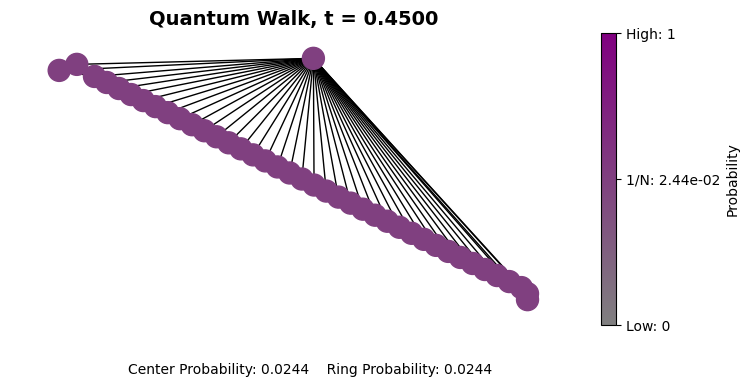

In [55]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
from matplotlib.backends.backend_pdf import PdfPages

# Dan's Wheel


wheel_ring = 40
wheel_graph = create_wheel_graph(wheel_ring)
my_graph = wheel_graph

# Get the adjacency from nx
Adj = nx.adjacency_matrix(wheel_graph)

# Initial state vector
num_nodes = Adj.shape[0]
pos_0 = np.zeros(num_nodes)
pos_0[0] = 1  # Classical initial state
psi_0 = pos_0.copy()  # Quantum initial state

# Time parameters:
b = 16
is_pi = False
timestep = 0.05  # step value
n = 25  # Number of steps

timestep_str = "0.05"
Qwalk = False

# Create a PdfPages object to save plots to a PDF
if Qwalk:
    pdf_filename = f'QWalk_t={timestep_str}_N_{wheel_ring}.pdf'
else:
    pdf_filename = f'Classic_Walk_t={timestep_str}_N_{wheel_ring}.pdf'
pdf = PdfPages(pdf_filename)



if Qwalk:
    # Quantum Walk Plots
    for i in range(n):
        t_n = i * timestep  # Current time step
    
        # Compute the quantum walk probabilities
        psi_t = quantum_walk(adjacency=Adj, initial_position=psi_0, time_step=t_n)
        prob_quantum = np.abs(psi_t)**2
    
        # Get time as fraction of pi
        if is_pi:
            t_str = get_pi_frac(i,b)
            title = f"Quantum Walk, t = {t_str}"
        else: 
            title = f"Quantum Walk, t = {t_n:.4f}"
        # Create a new figure and axis
        fig, ax = plt.subplots(figsize=(8, 4))
    
        # Visualize probabilities
        visualize_probabilities_for_wheel(my_graph, prob_quantum, labels=False, title=title, ax=ax)
    
        # Save the figure to the PDF
        pdf.savefig(fig)
        plt.close(fig)  # Close the figure to free up memory
        
else: 
    # Classical Walk Plots
    for i in range(n):
        t_n = i * timestep  # Current time step
    
        # Compute the classical walk probabilities
        pos_t = classical_random_walk(adjacency=Adj, initial_position=pos_0, time_step=t_n)
    
        # Get time as fraction of pi
        if is_pi:
            t_str = get_pi_frac(i,b)
            title = f"Quantum Walk, t = {t_str}"
        else: 
            title = f"Quantum Walk, t = {t_n:.4f}"
    
        # Create a new figure and axis
        fig, ax = plt.subplots(figsize=(8, 4))
    
        # Visualize probabilities
        visualize_probabilities_for_wheel(my_graph, pos_t, labels=False, title=title, ax=ax)
    
        # Save the figure to the PDF
        pdf.savefig(fig)
        plt.close(fig)  # Close the figure to free up memory

# Close the PdfPages object
pdf.close()

print(f"All plots have been saved to {pdf_filename}")
